In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
    # wget didnt work so I used urlib.request to get the data from the link address copied from the github.
import urllib.request
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
filename = 'pizza_steak.zip'
file = urllib.request.urlretrieve(url, filename) # This will download the file on the computer
  # To extract the pizza file.zip and save it to the same location as your present notebook location.
zip_ref = zipfile.ZipFile("./pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

NameError: name 'zipfile' is not defined

In [5]:
!dir pizza_steak\train\

 Volume in drive C is Windows-SSD
 Volume Serial Number is D242-1268

 Directory of c:\Deep_Learning\TensorFlow_For_Deep_Learning\pizza_steak\train

04-11-2024  10:09    <DIR>          .
04-11-2024  10:09    <DIR>          ..
04-11-2024  10:09    <DIR>          pizza
04-11-2024  10:09    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  346,283,872,256 bytes free


In [6]:
!dir pizza_steak\train\steak\

 Volume in drive C is Windows-SSD
 Volume Serial Number is D242-1268

 Directory of c:\Deep_Learning\TensorFlow_For_Deep_Learning\pizza_steak\train\steak

04-11-2024  10:09    <DIR>          .
04-11-2024  10:09    <DIR>          ..
04-11-2024  10:09            36,185 1000205.jpg
04-11-2024  10:09            34,497 100135.jpg
04-11-2024  10:09           116,802 101312.jpg
04-11-2024  10:09            56,754 1021458.jpg
04-11-2024  10:09            34,143 1032846.jpg
04-11-2024  10:09            24,688 10380.jpg
04-11-2024  10:09            37,134 1049459.jpg
04-11-2024  10:09            49,841 1053665.jpg
04-11-2024  10:09            59,983 1068516.jpg
04-11-2024  10:09            28,996 1068975.jpg
04-11-2024  10:09            29,525 1081258.jpg
04-11-2024  10:09            49,577 1090122.jpg
04-11-2024  10:09            59,976 1093966.jpg
04-11-2024  10:09            60,253 1098844.jpg
04-11-2024  10:09            69,843 1100074.jpg
04-11-2024  10:09            45,470 1105280.jpg
04-1

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [9]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


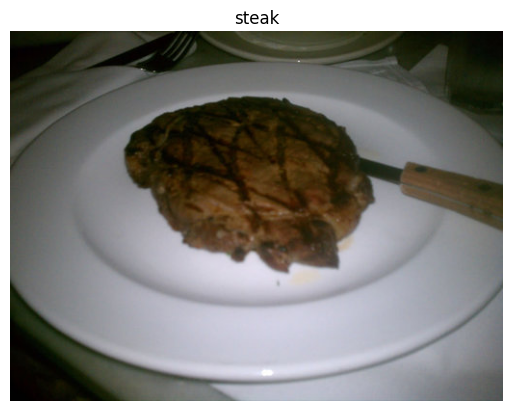

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (512, 507, 3)


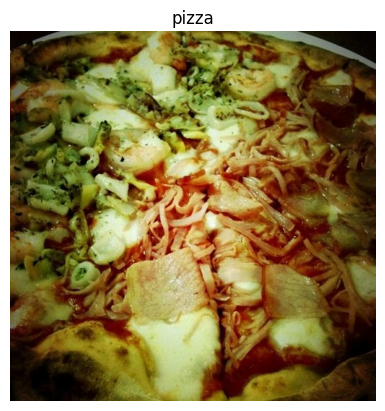

In [12]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [13]:
img

array([[[ 7,  0,  0],
        [ 8,  0,  0],
        [10,  2,  0],
        ...,
        [ 9,  3,  3],
        [ 8,  2,  2],
        [ 8,  2,  2]],

       [[ 8,  0,  0],
        [ 9,  1,  0],
        [10,  2,  0],
        ...,
        [10,  4,  4],
        [ 9,  3,  3],
        [ 9,  3,  3]],

       [[ 9,  1,  0],
        [10,  2,  0],
        [11,  3,  1],
        ...,
        [ 9,  3,  3],
        [ 9,  3,  3],
        [ 8,  2,  2]],

       ...,

       [[ 2,  1,  0],
        [ 2,  1,  0],
        [ 5,  1,  0],
        ...,
        [19, 12,  4],
        [19, 12,  4],
        [19, 10,  3]],

       [[ 5,  1,  0],
        [ 6,  2,  1],
        [ 7,  3,  2],
        ...,
        [19, 12,  4],
        [18, 11,  3],
        [19, 10,  3]],

       [[ 7,  3,  2],
        [ 8,  4,  3],
        [ 8,  4,  3],
        ...,
        [18, 11,  3],
        [17, 10,  2],
        [18,  9,  2]]], dtype=uint8)

In [14]:
tf.constant(img)

<tf.Tensor: shape=(512, 507, 3), dtype=uint8, numpy=
array([[[ 7,  0,  0],
        [ 8,  0,  0],
        [10,  2,  0],
        ...,
        [ 9,  3,  3],
        [ 8,  2,  2],
        [ 8,  2,  2]],

       [[ 8,  0,  0],
        [ 9,  1,  0],
        [10,  2,  0],
        ...,
        [10,  4,  4],
        [ 9,  3,  3],
        [ 9,  3,  3]],

       [[ 9,  1,  0],
        [10,  2,  0],
        [11,  3,  1],
        ...,
        [ 9,  3,  3],
        [ 9,  3,  3],
        [ 8,  2,  2]],

       ...,

       [[ 2,  1,  0],
        [ 2,  1,  0],
        [ 5,  1,  0],
        ...,
        [19, 12,  4],
        [19, 12,  4],
        [19, 10,  3]],

       [[ 5,  1,  0],
        [ 6,  2,  1],
        [ 7,  3,  2],
        ...,
        [19, 12,  4],
        [18, 11,  3],
        [19, 10,  3]],

       [[ 7,  3,  2],
        [ 8,  4,  3],
        [ 8,  4,  3],
        ...,
        [18, 11,  3],
        [17, 10,  2],
        [18,  9,  2]]], dtype=uint8)>

In [15]:
img / 255 # Normalizing all values to be between 0 & 1

array([[[0.02745098, 0.        , 0.        ],
        [0.03137255, 0.        , 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        ...,
        [0.03529412, 0.01176471, 0.01176471],
        [0.03137255, 0.00784314, 0.00784314],
        [0.03137255, 0.00784314, 0.00784314]],

       [[0.03137255, 0.        , 0.        ],
        [0.03529412, 0.00392157, 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        ...,
        [0.03921569, 0.01568627, 0.01568627],
        [0.03529412, 0.01176471, 0.01176471],
        [0.03529412, 0.01176471, 0.01176471]],

       [[0.03529412, 0.00392157, 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        [0.04313725, 0.01176471, 0.00392157],
        ...,
        [0.03529412, 0.01176471, 0.01176471],
        [0.03529412, 0.01176471, 0.01176471],
        [0.03137255, 0.00784314, 0.00784314]],

       ...,

       [[0.00784314, 0.00392157, 0.        ],
        [0.00784314, 0.00392157, 0.        ],
        [0.01960784, 0

In [16]:
import tensorflow as tf 
from tensorflow.keras.utils import image_dataset_from_directory  
# set the seed
tf.random.set_seed(42)
 
# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
#train_datagen = ImageDataGenerator(rescale=1./255)
#valid_datagen = ImageDataGenerator(rescale=1./255)
# DEPRECATED!
 
# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'
 
# Import data from directories and turn it into batches
scaling_layer = tf.keras.layers.Rescaling(1./255)
train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
valid_data = image_dataset_from_directory(directory=test_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
valid_data_scaled = valid_data.map(lambda x, y: (scaling_layer(x), y))
 
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
 
# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
 
# Fit the model
history_1 = model_1.fit(train_data_scaled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 6s 58ms/step - loss: 0.6222 - accuracy: 0.6407 - val_loss: 0.4878 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 2s 48ms/step - loss: 0.4523 - accuracy: 0.7933 - val_loss: 0.4277 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 2s 48ms/step - loss: 0.3974 - accuracy: 0.8267 - val_loss: 0.3258 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 2s 48ms/step - loss: 0.3765 - accuracy: 0.8413 - val_loss: 0.3118 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 2s 48ms/step - loss: 0.3390 - accuracy: 0.8753 - val_loss: 0.3640 - val_accuracy: 0.8160


In [17]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [18]:
!nvidia-smi

Mon Nov  4 13:18:21 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.44                 Driver Version: 552.44         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   61C    P0             60W /   80W |    4168MiB /   6144MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [20]:
print(tf.__version__)

2.10.0


In [21]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.10.0
Num GPUs Available: 1


In [22]:
import tensorflow as tf
import time

# Create a large random tensor
x = tf.random.normal([10000, 10000])

# Run on GPU
with tf.device("GPU:0"):
    start = time.time()
    tf.matmul(x, x)
    print("GPU time:", time.time() - start)

# Run on CPU
with tf.device("CPU:0"):
    start = time.time()
    tf.matmul(x, x)
    print("CPU time:", time.time() - start)


GPU time: 0.006012439727783203
CPU time: 8.697069644927979


In [25]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])

model_2.compile(
    loss = "binary_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]
)

history_2 = model_2.fit(train_data_scaled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Epoch 1/5
47/47 [==============================] - 3s 35ms/step - loss: 6.0968 - accuracy: 0.5893 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 2s 39ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 2s 47ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 2s 46ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 2s 47ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [26]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Wow. One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

> 🔑 **Note:** You can think of trainable parameters as *patterns a model can learn from data*. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers? 

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

> 🔑 **Note:** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.

In [28]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])

model_3.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

history_3 = model_3.fit(train_data_scaled, 
                        epochs=20,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Epoch 1/20
47/47 [==============================] - 2s 37ms/step - loss: 1.5794 - accuracy: 0.6573 - val_loss: 0.4892 - val_accuracy: 0.7680
Epoch 2/20
47/47 [==============================] - 2s 34ms/step - loss: 0.5158 - accuracy: 0.7613 - val_loss: 0.4737 - val_accuracy: 0.7860
Epoch 3/20
47/47 [==============================] - 2s 36ms/step - loss: 0.4567 - accuracy: 0.7947 - val_loss: 0.4812 - val_accuracy: 0.7760
Epoch 4/20
47/47 [==============================] - 3s 52ms/step - loss: 0.4460 - accuracy: 0.7947 - val_loss: 0.5296 - val_accuracy: 0.7300
Epoch 5/20
47/47 [==============================] - 2s 49ms/step - loss: 0.5653 - accuracy: 0.7407 - val_loss: 0.4649 - val_accuracy: 0.7900
Epoch 6/20
47/47 [==============================] - 2s 47ms/step - loss: 0.5844 - accuracy: 0.7480 - val_loss: 0.4840 - val_accuracy: 0.8080
Epoch 7/20
47/47 [==============================] - 2s 46ms/step - loss: 0.5123 - accuracy: 0.7580 - val_loss: 0.6128 - val_accuracy: 0.7440
Epoch 8/20
47

In [29]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
 dense_10 (Dense)            (None, 100)               1100      
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,055,111
Trainable params: 15,055,111
Non-trainable params: 0
_________________________________________________________________
